# Learning rule II

In [1]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network, run_network_recall_limit
from connectivity import designed_matrix_sequences, designed_matrix_sequences_local
from analysis import get_recall_duration_for_pattern, get_recall_duration_sequence
from analysis import time_t1, time_t2, time_t1_local, time_t2_local, time_t2_complicated

## Learning rule

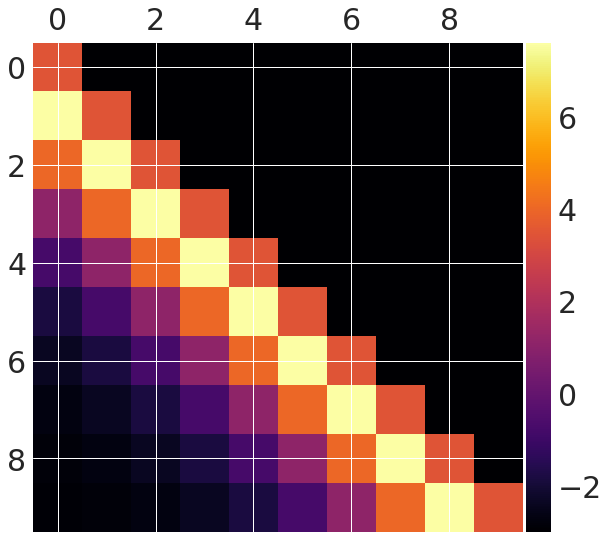

In [49]:
N = 10
tau_z = 0.150
tau_z_post = 0.005
tau_w = 0.100
max_w = 30.0
min_w = -3.0

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
epochs = 10
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z, tau_z_post, 
                    tau_w, epochs=epochs, max_w=max_w, min_w=min_w, save_w_history=True, pre_rule=True)

w = dic['w']
x_total = dic['x']
z_history = dic['z']
z_post_history = dic['z_post']
w_history = dic['w_history']

fig = plt.figure()
ax = fig.add_subplot(111)

norm = matplotlib.colors.Normalize(0, 2)
cmap = matplotlib.cm.inferno

im = ax.matshow(w, cmap=cmap)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax);

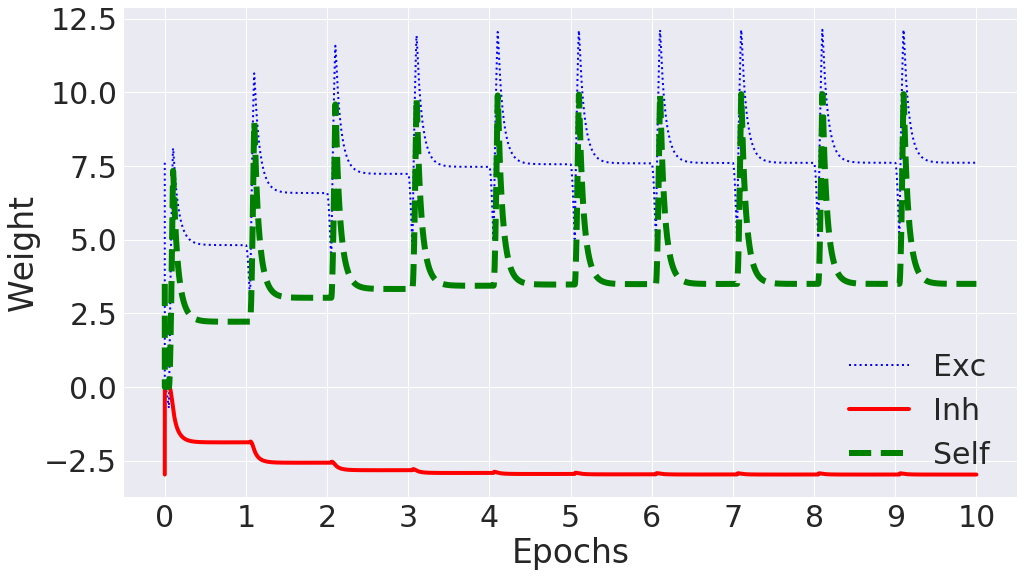

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

epoch_length = N * (training_time) + (inter_sequence_time )
T = epoch_length * epochs
time = np.arange(0, T + dt, dt)

w_10 = w_history[:, 1, 0]
w_01 = w_history[:, 0, 1]
w_11 = w_history[:, 1, 1]

ax.plot(time, w_10, color='blue', ls=':', linewidth=2, label='Exc')
ax.plot(time, w_01, color='red', ls='-', linewidth=4, label='Inh')
ax.plot(time, w_11, color='green', ls='--', linewidth=6, label='Self')

tick_spacing = 2
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
ticks =  [0, 2,    4,   6,   8,   10,  12,  14, 16,  18, 20]

plt.xticks(ticks, labels)

ax.legend(loc=4)

ax.set_xlabel('Epochs')
ax.set_ylabel('Weight');

### Training time

In [75]:
training_times_vector = np.arange(0.050, 1.050, 0.050)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
max_w = 10.0
min_w = -3.0

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

for training_time in training_times_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False)

    w = dic['w']
    w_self.append(w[pattern, pattern])
    w_transition.append(w[pattern, pattern_from])
    w_inhition.append(w[pattern_from, pattern])

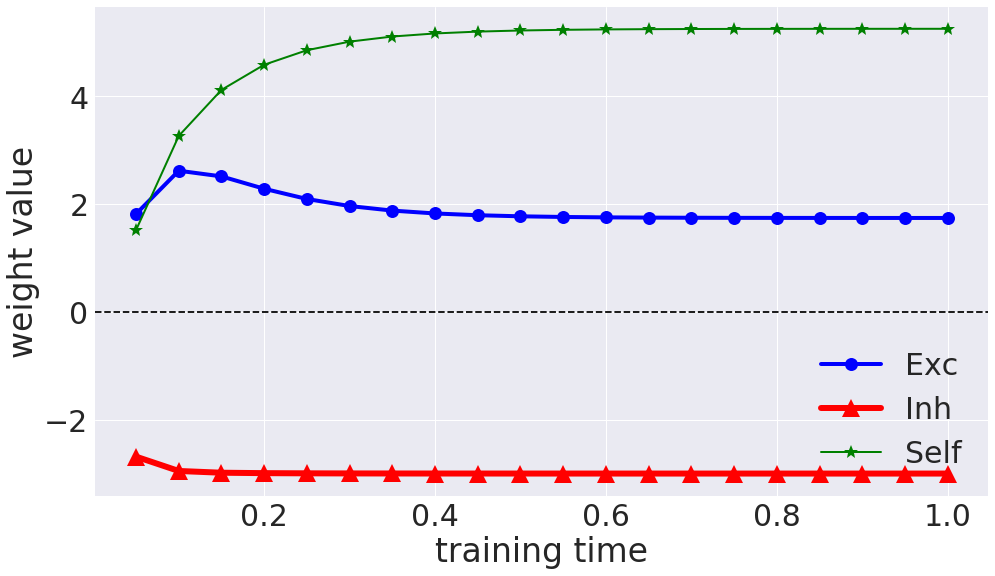

In [87]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(training_times_vector, w_transition, 'o-', color='blue', linewidth=4, markersize=13, label='Exc')
ax1.plot(training_times_vector, w_inhition, '^-', color='red', linewidth=6, markersize=18, label='Inh')
ax1.plot(training_times_vector, w_self, '*-', color='green', linewidth=2, markersize=15, label='Self')

ax1.axhline(0, ls='--', color='black')

ax1.set_xlabel('training time')
ax1.set_ylabel('weight value')
ax1.legend(loc=4);

#### Tau_w

In [71]:
tau_w_vector = np.arange(0.20, 0.520, 0.020)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
max_w = 10.0
min_w = -3.0

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

for tau_w in tau_w_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False)

    w = dic['w']
    w_self.append(w[pattern, pattern])
    w_transition.append(w[pattern, pattern_from])
    w_inhition.append(w[pattern_from, pattern])

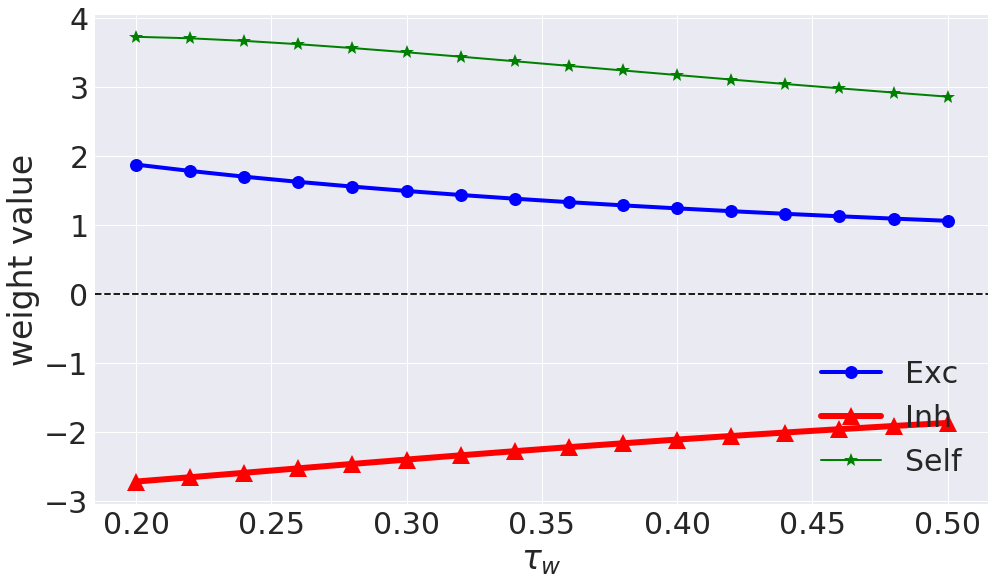

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(tau_w_vector, w_transition, 'o-', color='blue', linewidth=4, markersize=13, label='Exc')
ax1.plot(tau_w_vector, w_inhition, '^-', color='red', linewidth=6, markersize=18, label='Inh')
ax1.plot(tau_w_vector, w_self, '*-', color='green', linewidth=2, markersize=15, label='Self')

ax1.axhline(0, ls='--', color='black')

ax1.set_xlabel(r'$\tau_w$')
ax1.set_ylabel('weight value')
ax1.legend(loc=4);

#### Tau_z

In [101]:
tau_z_vector = np.arange(0.050, 0.550, 0.050)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
max_w = 80.0
min_w = -50.0

training_time = 0.350
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

for tau_z in tau_z_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False, pre_rule=False)

    w = dic['w']
    w_self.append(w[pattern, pattern])
    w_transition.append(w[pattern, pattern_from])
    w_inhition.append(w[pattern_from, pattern])

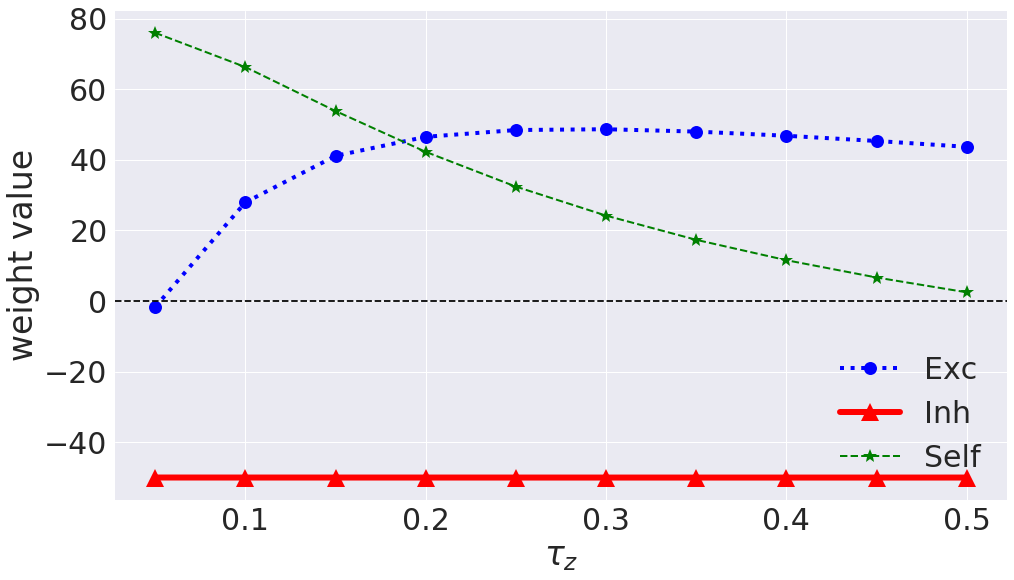

In [103]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(tau_z_vector, w_transition, 'o:', color='blue', linewidth=4, markersize=13, label='Exc')
ax1.plot(tau_z_vector, w_inhition, '^-', color='red', linewidth=6, markersize=18, label='Inh')
ax1.plot(tau_z_vector, w_self, '*--', color='green', linewidth=2, markersize=15, label='Self')

ax1.axhline(0, ls='--', color='black')

ax1.set_xlabel(r'$\tau_z$')
ax1.set_ylabel('weight value')
ax1.legend(loc=4);

### Effects of tau_z_post

In [89]:
tau_z_vector = np.arange(0.005, 0.105, 0.005)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.300
tau_z_post = 0.005
tau_w = 0.100
max_w = 100.0
min_w = -3.0

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

for tau_z_post in tau_z_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False, pre_rule=True)

    w = dic['w']
    w_self.append(w[pattern, pattern])
    w_transition.append(w[pattern, pattern_from])
    w_inhition.append(w[pattern_from, pattern])

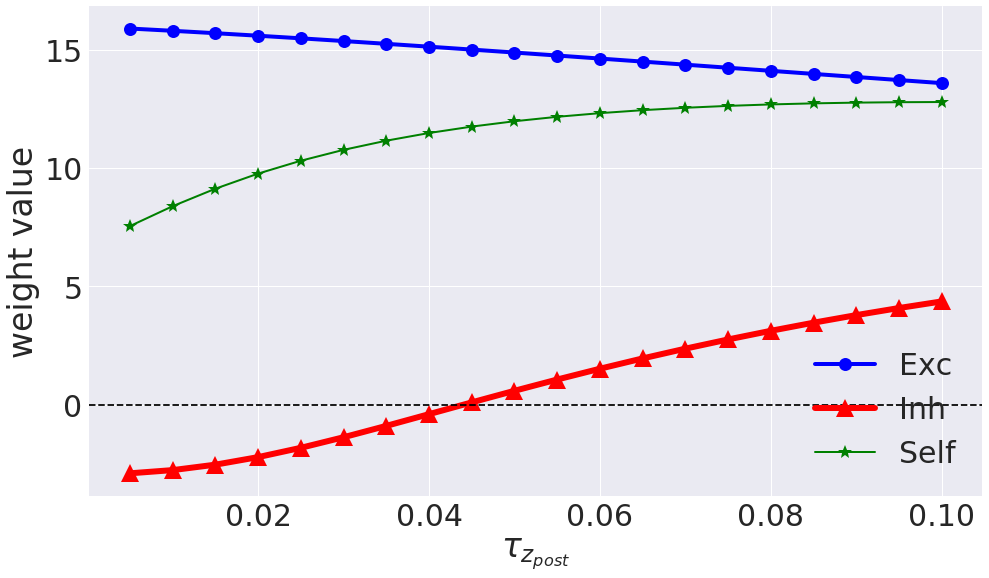

In [90]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(tau_z_vector, w_transition, 'o-', color='blue', linewidth=4, markersize=13, label='Exc')
ax1.plot(tau_z_vector, w_inhition, '^-', color='red', linewidth=6, markersize=18, label='Inh')
ax1.plot(tau_z_vector, w_self, '*-', color='green', linewidth=2, markersize=15, label='Self')

ax1.axhline(0, ls='--', color='black')

ax1.set_xlabel(r'$\tau_{z_{post}}$')
ax1.set_ylabel('weight value')
ax1.legend(loc=4);

#### Effects of max_w

In [27]:
max_w_vector = np.arange(1, 56.0 , 5.0)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
max_w = 30.0
min_w = -3.0

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

for max_w in max_w_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False, pre_rule=True)

    w = dic['w']
    w_self.append(w[pattern, pattern])
    w_transition.append(w[pattern, pattern_from])
    w_inhition.append(w[pattern_from, pattern])

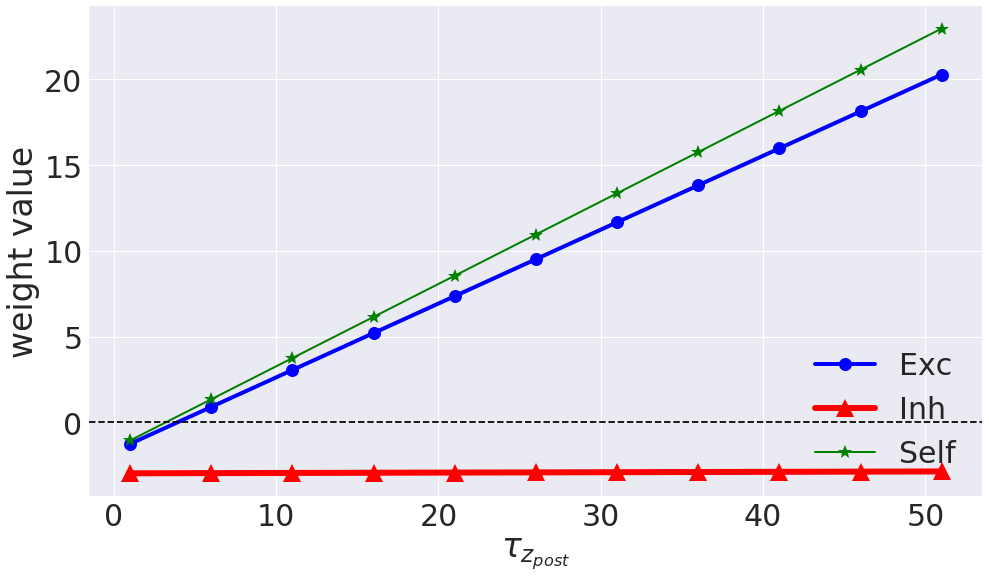

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(max_w_vector, w_transition, 'o-', color='blue', linewidth=4, markersize=13, label='Exc')
ax1.plot(max_w_vector, w_inhition, '^-', color='red', linewidth=6, markersize=18, label='Inh')
ax1.plot(max_w_vector, w_self, '*-', color='green', linewidth=2, markersize=15, label='Self')

ax1.axhline(0, ls='--', color='black')

ax1.set_xlabel(r'$\tau_{z_{post}}$')
ax1.set_ylabel('weight value')
ax1.legend(loc=4);

#### Effects of min_w

In [29]:
min_w_vector = -np.arange(1, 56.0 , 5.0)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
max_w = 30.0
min_w = -3.0

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

for min_w in min_w_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False, pre_rule=True)

    w = dic['w']
    w_self.append(w[pattern, pattern])
    w_transition.append(w[pattern, pattern_from])
    w_inhition.append(w[pattern_from, pattern])

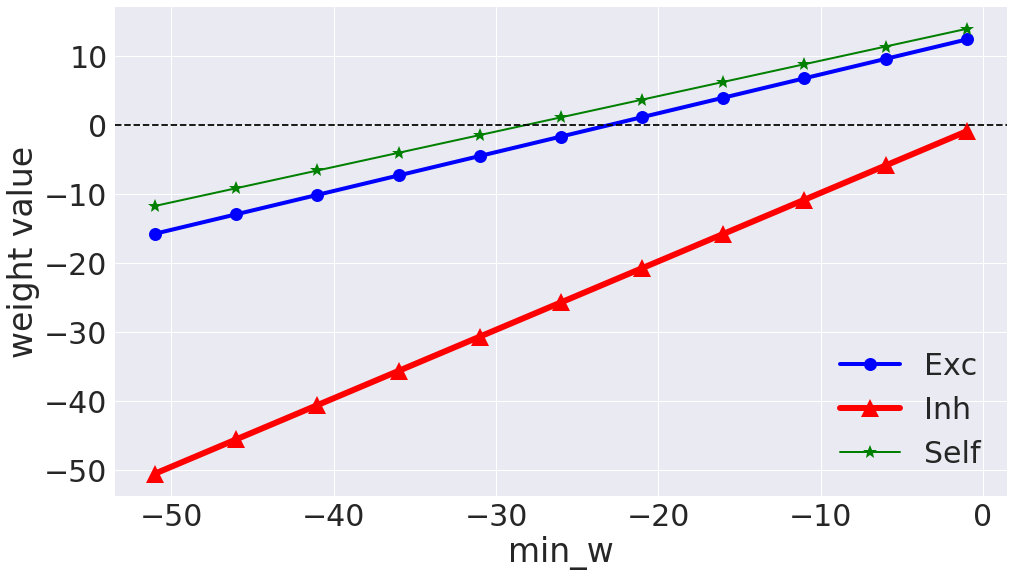

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(min_w_vector, w_transition, 'o-', color='blue', linewidth=4, markersize=13, label='Exc')
ax1.plot(min_w_vector, w_inhition, '^-', color='red', linewidth=6, markersize=18, label='Inh')
ax1.plot(min_w_vector, w_self, '*-', color='green', linewidth=2, markersize=15, label='Self')

ax1.axhline(0, ls='--', color='black')

ax1.set_xlabel(r'min_w')
ax1.set_ylabel('weight value')
ax1.legend(loc=4);

## Learning rule and recall time

In [56]:
tau_z_vector = np.arange(0.050, 0.550, 0.050)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
max_w = 10.0
min_w = -3.0

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

G = 100.0
threshold = 0.5
tau_m = 0.010
I_cue = sequence1[0]
T_cue = tau_z
T = 10.0

recall_times = []
for tau_z in tau_z_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False, pre_rule=True)
    
    w = dic['w']
    dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)

In [58]:
recall_times

[0.33300000000000002,
 0.079000000000000015,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

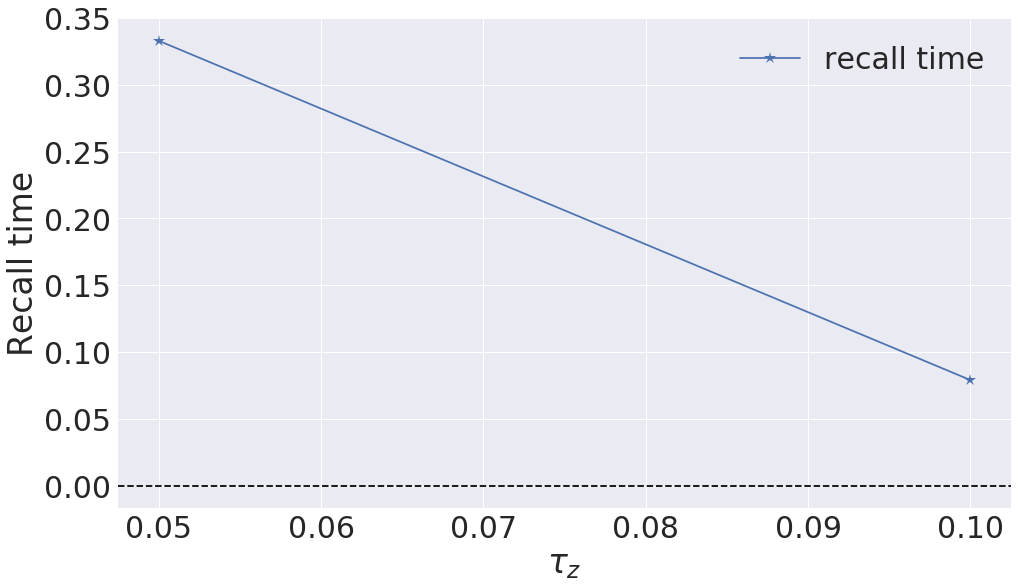

In [57]:
plt.plot(tau_z_vector, recall_times, '*-', markersize=13, label='recall time')

plt.axhline(0, ls='--', color='black')

plt.xlabel(r'$\tau_{z}$')
plt.ylabel('Recall time')
plt.legend();

#### max_w

In [77]:
min_w_vector = -np.arange(1, 56.0 , 5.0)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
max_w = 10.0
min_w = -3.0

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

G = 100.0
threshold = 0.5
tau_m = 0.010
I_cue = sequence1[0]
T_cue = tau_z
T = 10.0

recall_times = []
for min_w in min_w_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False, pre_rule=True)
    
    w = dic['w']
    dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)

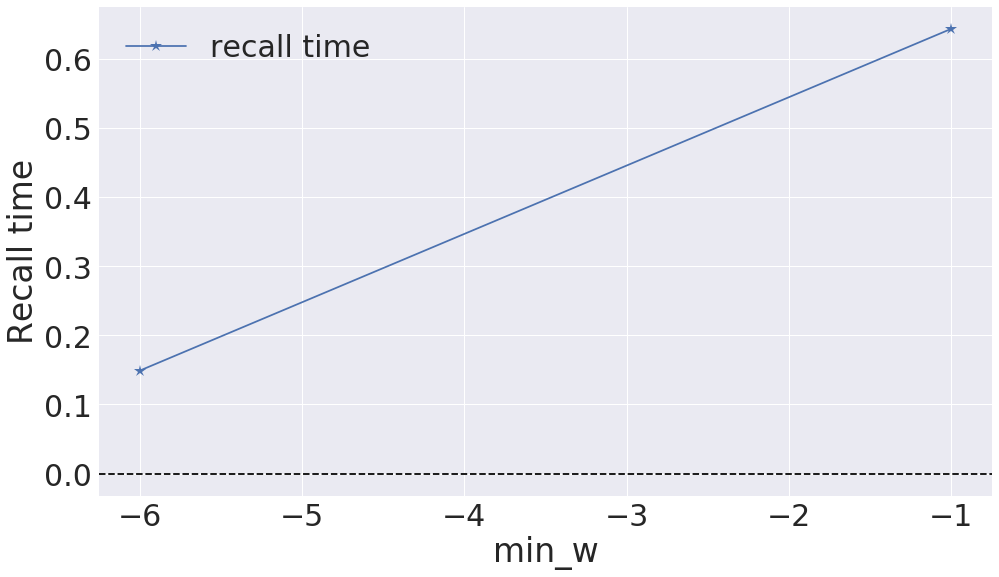

In [79]:
plt.plot(min_w_vector, recall_times, '*-', markersize=13, label='recall time')

plt.axhline(0, ls='--', color='black')

plt.xlabel(r'min_w')
plt.ylabel('Recall time')
plt.legend();

#### Max_w

In [85]:
max_w_vector = np.arange(1, 56.0 , 5.0)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
max_w = 10.0
min_w = -3.0

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sequences = [sequence1]

G = 100.0
threshold = 0.5
tau_m = 0.010
I_cue = sequence1[0]
T_cue = tau_z
T = 10.0

recall_times = []
for max_w in max_w_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False, pre_rule=True)
    
    w = dic['w']
    dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)

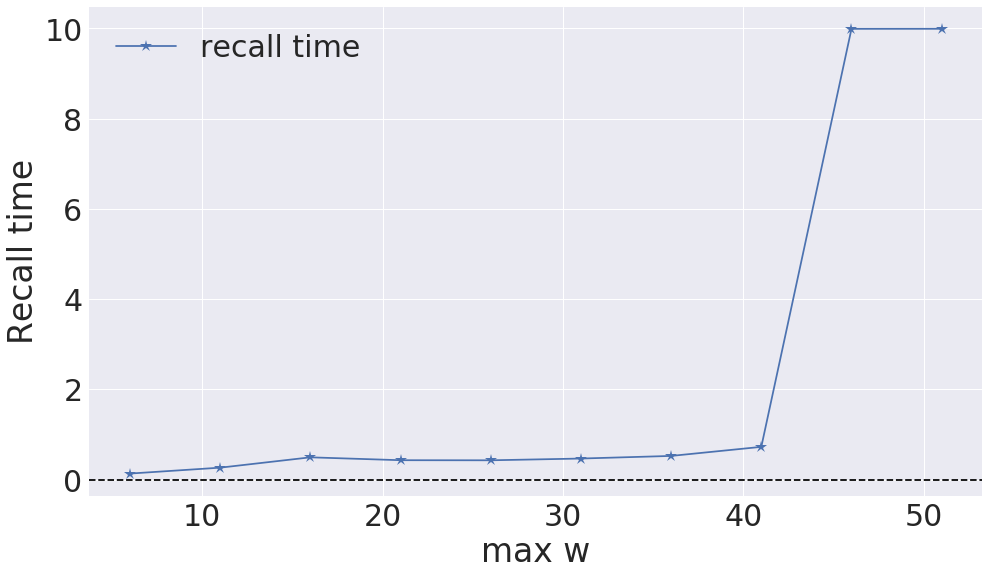

In [86]:
plt.plot(max_w_vector, recall_times, '*-', markersize=13, label='recall time')

plt.axhline(0, ls='--', color='black')

plt.xlabel(r'max w')
plt.ylabel('Recall time')
plt.legend();